## Um estudo sobre acidentes aéreos
por Guilherme Cramer

#### Introdução:

Por muitos anos os aviões têm sido considerados o segundo meio de transporte mais seguro do mundo, perdendo apenas para elevadores. Cobrindo longas viagens em um curto espaço de tempo, tais aeronaves proveram diversas vantagens para o mundo, tanto comercial quanto a lazer. Infelizmente, como todo meio de transporte, as aeronaves possuem sua conta de tragédias.
A análise de dados na aviação facilita o desenvolvimento de estratégias para
lidar com diversos problemas como o número de acidentes aéreos, que, muitas vezes,
pode colocar em dúvida a reputação da aviação como meio de transporte mais seguro
do mundo.



#### Motivação:
O principal objetivo desse estudo é entender as reais causas das ocorrências aéreas. Esse objetivo possui duas facetas bem definidas: a frequência de ocorrências a gravidade delas. Este estudo será como guia para que o transporte aéreo se torne cada dia mais seguro, ao se minimizar o número de problemas aéreos e diminuir a potencial gravidade deles. 

#### Observação:
Um fato primordial na análise desses dados, é que eles correspondem a dados de ocorrências aéreas no território brasileiro. Sendo assim, esses dados correspondem a eventos em que algo eu errado. Infelizmente, não temos os dados do número de voos no território nacional. 

Essa informação é de extrema importância para a forma que os números serão analisados. Por exemplo, aso se analisar a quantidades de ocorrência pelo tipo de aeronave, irá notar-se que a grande maioria é do tipo "AVIÃO". Mas isso não quer dizer necessariamente que esse tipo gera mais ocorrência. Talvez o real motivo seja que esse tipo de aeronave seja o mais comum no cenário nacional e consequentemente gere mais ocorrências.


In [198]:
%matplotlib inline
import pandas as pd #Para criação de DataFrames
import matplotlib.pyplot as plt #Para plotagem
import random
import seaborn as sns
import numpy.ma as ma
import numpy as np 
import missingno as msno


#### Leitura dos dados:

In [2]:
ocorrencia=pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia.csv',sep = ';',encoding='utf8', na_values=['****','*****', '***','','####'],header=0)
ocorrencia_tipo=pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia_tipo.csv',sep = ';',encoding='utf8',na_values=['****', '***',''], header=0)  
aeronave=pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/aeronave.csv',sep = ';', encoding='utf8', na_values=['****', '***',''], header=0)
fator_contribuinte=pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/fator_contribuinte.csv',sep = ';', encoding='utf8', na_values=['****', '***',''],  header=0)
recomendacao=pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/recomendacao.csv',sep = ';', encoding='utf8', na_values=['****', '***',''],  header=0)

#### Entendimento dos dados:

In [1]:
from IPython.display import IFrame
IFrame('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/modelo_dados.png', width=800, height=400)

##### Ocorrência:

Essa é a tabela principal. Correspondem as principais características fa occorrência em si.

In [4]:
ocorrencia.iloc[:,5:].head()

,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,INCIDENTE,NaN,NaN,PORTO ALEGRE,RS,BRASIL,SBPA,05/01/2012,20:27:00,NaN,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
1,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,BRASIL,SBGR,06/01/2012,13:44:00,SIM,FINALIZADA,A-582/CENIPA/2014,SIM,2016-09-01,3,1,NÃO
2,ACIDENTE,NaN,NaN,VIAMÃO,RS,BRASIL,NaN,06/01/2012,13:00:00,NaN,FINALIZADA,A-070/CENIPA/2013,SIM,2013-11-27,0,1,NÃO
3,ACIDENTE,NaN,NaN,SÃO SEBASTIÃO,SP,BRASIL,NaN,06/01/2012,17:00:00,NaN,NaN,NaN,NÃO,NaN,0,1,NÃO
4,ACIDENTE,NaN,NaN,SÃO SEPÉ,RS,BRASIL,NaN,06/01/2012,16:30:00,SIM,FINALIZADA,A-071/CENIPA/2013,SIM,2013-11-27,0,1,NÃO


In [5]:
print(ocorrencia.nunique())

codigo_ocorrencia                 5167
codigo_ocorrencia1                5167
codigo_ocorrencia2                5167
codigo_ocorrencia3                5167
codigo_ocorrencia4                5167
ocorrencia_classificacao             3
ocorrencia_latitude               2587
ocorrencia_longitude              2590
ocorrencia_cidade                 1053
ocorrencia_uf                       27
ocorrencia_pais                      1
ocorrencia_aerodromo               513
ocorrencia_dia                    2684
ocorrencia_hora                    923
investigacao_aeronave_liberada       2
investigacao_status                  2
divulgacao_relatorio_numero       1720
divulgacao_relatorio_publicado       2
divulgacao_dia_publicacao          179
total_recomendacoes                 13
total_aeronaves_envolvidas           3
ocorrencia_saida_pista               2
dtype: int64


In [7]:
ocorrencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167 entries, 0 to 5166
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   codigo_ocorrencia               5167 non-null   int64 
 1   codigo_ocorrencia1              5167 non-null   int64 
 2   codigo_ocorrencia2              5167 non-null   int64 
 3   codigo_ocorrencia3              5167 non-null   int64 
 4   codigo_ocorrencia4              5167 non-null   int64 
 5   ocorrencia_classificacao        5167 non-null   object
 6   ocorrencia_latitude             3674 non-null   object
 7   ocorrencia_longitude            3673 non-null   object
 8   ocorrencia_cidade               5167 non-null   object
 9   ocorrencia_uf                   5165 non-null   object
 10  ocorrencia_pais                 5167 non-null   object
 11  ocorrencia_aerodromo            3269 non-null   object
 12  ocorrencia_dia                  5167 non-null   

A partir da análise das variáveis de como elas potencialmente influenciam na gravidade e frequência da ocorrência, vamos selecionar as características mais importantes da tabela ocorrência. Esse filtro tem como finalidade uma limpeza dos dados e facilidade de entendimento nas análises futuras.

In [8]:
ocorrencia_main_col = ['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2',
                       'codigo_ocorrencia3', 'codigo_ocorrencia4','ocorrencia_classificacao',
                        'ocorrencia_uf','ocorrencia_aerodromo','ocorrencia_dia',
                       'ocorrencia_hora','investigacao_aeronave_liberada',
                       'investigacao_status',
                       'divulgacao_relatorio_publicado',
                       'total_recomendacoes', 'total_aeronaves_envolvidas',
                       'ocorrencia_saida_pista']
ocorrencia = ocorrencia[ocorrencia_main_col]

In [9]:
ocorrencia.iloc[:,5:]

,ocorrencia_classificacao,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_publicado,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,INCIDENTE,RS,SBPA,05/01/2012,20:27:00,NaN,FINALIZADA,NÃO,0,1,NÃO
1,ACIDENTE,SP,SBGR,06/01/2012,13:44:00,SIM,FINALIZADA,SIM,3,1,NÃO
2,ACIDENTE,RS,NaN,06/01/2012,13:00:00,NaN,FINALIZADA,SIM,0,1,NÃO
3,ACIDENTE,SP,NaN,06/01/2012,17:00:00,NaN,NaN,NÃO,0,1,NÃO
4,ACIDENTE,RS,NaN,06/01/2012,16:30:00,SIM,FINALIZADA,SIM,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...
5162,ACIDENTE,GO,NaN,30/12/2021,20:30:00,SIM,ATIVA,NÃO,0,1,NÃO
5163,ACIDENTE,SP,NaN,31/12/2021,09:30:00,SIM,ATIVA,NÃO,0,1,NÃO
5164,INCIDENTE GRAVE,RS,SSNH,31/12/2021,11:59:00,SIM,FINALIZADA,NÃO,0,1,NÃO
5165,INCIDENTE,PR,SBBI,31/12/2021,15:12:00,SIM,FINALIZADA,NÃO,0,1,NÃO


In [10]:
ocorrencia.isnull().sum()

codigo_ocorrencia                    0
codigo_ocorrencia1                   0
codigo_ocorrencia2                   0
codigo_ocorrencia3                   0
codigo_ocorrencia4                   0
ocorrencia_classificacao             0
ocorrencia_uf                        2
ocorrencia_aerodromo              1898
ocorrencia_dia                       0
ocorrencia_hora                      1
investigacao_aeronave_liberada    1778
investigacao_status                257
divulgacao_relatorio_publicado       0
total_recomendacoes                  0
total_aeronaves_envolvidas           0
ocorrencia_saida_pista               0
dtype: int64

##### Tipo ocorrencia:

Essa tabela corresponde a uma especificação mais detalhada da ocorrência em si. 

In [11]:
ocorrencia_tipo.head(15)

,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,45331,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,OTHR
1,45332,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G
2,45333,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP
3,45334,ESTOURO DE PNEU,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
4,45390,OPERAÇÃO A BAIXA ALTITUDE,OPERAÇÃO A BAIXA ALTITUDE,LALT
5,45391,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP
6,45392,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO,LOC-I
7,45393,EXCURSÃO DE PISTA,EXCURSÃO DE PISTA,RE
8,45393,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G
9,45396,COM TREM DE POUSO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP


In [12]:
print(ocorrencia_tipo.nunique())

codigo_ocorrencia1           5167
ocorrencia_tipo                80
ocorrencia_tipo_categoria      80
taxonomia_tipo_icao            32
dtype: int64


In [13]:
ocorrencia_tipo.isnull().sum()

codigo_ocorrencia1           0
ocorrencia_tipo              1
ocorrencia_tipo_categoria    1
taxonomia_tipo_icao          1
dtype: int64

Para essa tabela em questão ('ocorrencia_tipo'), também foram selecionadas apenas as variáveis que foram consideradas mais relevantes para o problema. 

In [14]:
ocorrencia_tipo_main_col = ['codigo_ocorrencia1','ocorrencia_tipo','ocorrencia_tipo_categoria']
ocorrencia_tipo = ocorrencia_tipo[ocorrencia_tipo_main_col]

##### Aeronave:

Essa tabela corresponde a informações mais detalhadas da aeronave que reportou a ocorrencia. 

In [15]:
aeronave.head()

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,...,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,45331,PRTKB,NaN,AVIÃO,AEROSPATIALE AND ALENIA,ATR-42-500,AT45,TURBOÉLICE,BIMOTOR,18600,...,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0
1,45332,PTUDD,NaN,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1800,...,BRASIL,BRASIL,AVIÃO,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,AGRÍCOLA,SUBSTANCIAL,0
2,45333,PTGOO,NaN,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201,IPAN,PISTÃO,MONOMOTOR,1800,...,BRASIL,BRASIL,AVIÃO,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0
3,45334,PRMHX,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-214,A320,JATO,BIMOTOR,77000,...,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,CORRIDA APÓS POUSO,REGULAR,LEVE,0
4,45390,PTUEW,NaN,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1800,...,BRASIL,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0


Para a tabela em questão também foi realizada um filtro com as variáveis mais importantes para o problema de negócio em questão. 

In [16]:
aeronave['aeronave_pais_fabricante'].equals(aeronave['aeronave_pais_registro'])
aeronave.drop('aeronave_pais_registro',axis =1,inplace= True)
aeronave['aeronave_pmd_categoria'].equals(aeronave['aeronave_pmd'])
aeronave.drop('aeronave_pmd_categoria',axis =1,inplace= True)

In [17]:
aeronave_main_col = ['codigo_ocorrencia2', 'aeronave_matricula',
       'aeronave_operador_categoria', 'aeronave_tipo_veiculo',
                      'aeronave_modelo','aeronave_motor_tipo','aeronave_motor_quantidade',
                      'aeronave_pmd', 'aeronave_assentos', 'aeronave_ano_fabricacao',
                      'aeronave_registro_categoria',
       'aeronave_registro_segmento', 'aeronave_voo_origem',
       'aeronave_voo_destino', 'aeronave_fase_operacao',
       'aeronave_tipo_operacao', 'aeronave_nivel_dano',
       'aeronave_fatalidades_total']
aeronave = aeronave[aeronave_main_col]                  
                
                      

In [18]:
aeronave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo_ocorrencia2           5235 non-null   int64  
 1   aeronave_matricula           5235 non-null   object 
 2   aeronave_operador_categoria  2287 non-null   object 
 3   aeronave_tipo_veiculo        5080 non-null   object 
 4   aeronave_modelo              5065 non-null   object 
 5   aeronave_motor_tipo          5003 non-null   object 
 6   aeronave_motor_quantidade    5143 non-null   object 
 7   aeronave_pmd                 5235 non-null   int64  
 8   aeronave_assentos            5041 non-null   float64
 9   aeronave_ano_fabricacao      5035 non-null   float64
 10  aeronave_registro_categoria  5080 non-null   object 
 11  aeronave_registro_segmento   5163 non-null   object 
 12  aeronave_voo_origem          5050 non-null   object 
 13  aeronave_voo_desti

In [19]:
aeronave.isnull().sum()

codigo_ocorrencia2                0
aeronave_matricula                0
aeronave_operador_categoria    2948
aeronave_tipo_veiculo           155
aeronave_modelo                 170
aeronave_motor_tipo             232
aeronave_motor_quantidade        92
aeronave_pmd                      0
aeronave_assentos               194
aeronave_ano_fabricacao         200
aeronave_registro_categoria     155
aeronave_registro_segmento       72
aeronave_voo_origem             185
aeronave_voo_destino            183
aeronave_fase_operacao           26
aeronave_tipo_operacao          141
aeronave_nivel_dano              47
aeronave_fatalidades_total        0
dtype: int64

In [20]:
print(aeronave.nunique())

codigo_ocorrencia2             5167
aeronave_matricula             3902
aeronave_operador_categoria      10
aeronave_tipo_veiculo             9
aeronave_modelo                 737
aeronave_motor_tipo               5
aeronave_motor_quantidade         5
aeronave_pmd                    459
aeronave_assentos                86
aeronave_ano_fabricacao          80
aeronave_registro_categoria       9
aeronave_registro_segmento       12
aeronave_voo_origem             677
aeronave_voo_destino            674
aeronave_fase_operacao           31
aeronave_tipo_operacao            9
aeronave_nivel_dano               4
aeronave_fatalidades_total       10
dtype: int64


##### Fator contribuinte:

Essa tabela corresponde aos fatores que influenciaram a ocorrência do problema.

In [21]:
fator_contribuinte.head()

,codigo_ocorrencia3,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,45331,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,45331,ATENÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
2,45331,CAPACITAÇÃO E TREINAMENTO,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO
3,45331,CLIMA ORGANIZACIONAL,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO
4,45331,COMUNICAÇÃO,ASPECTO PSICOLÓGICO,PSICOSSOCIAL,FATOR HUMANO


In [22]:
fator_contribuinte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3464 entries, 0 to 3463
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   codigo_ocorrencia3   3464 non-null   int64 
 1   fator_nome           3464 non-null   object
 2   fator_aspecto        3445 non-null   object
 3   fator_condicionante  3110 non-null   object
 4   fator_area           3445 non-null   object
dtypes: int64(1), object(4)
memory usage: 135.4+ KB


In [23]:
fator_contribuinte.isnull().sum()

codigo_ocorrencia3       0
fator_nome               0
fator_aspecto           19
fator_condicionante    354
fator_area              19
dtype: int64

Como será visto abaixo, essa tabela possui apenas 944 chaves de ocorrências distintas, enquanto as tabelas analisadas até então possuíam 5147. Dessa forma, ao unificar as tabelas através das chaves será introduzido uma grande quantidade de dados ausentes.

In [24]:
print(fator_contribuinte.nunique())

codigo_ocorrencia3     944
fator_nome              74
fator_aspecto           11
fator_condicionante      6
fator_area               4
dtype: int64


##### Recomendação:


In [25]:
 # redundante
recomendacao.drop(['recomendacao_destinatario'],axis = 1,inplace = True)
# apesar de ser uma coluna ruim, preciasa de uma atencao especia para p seu processamento. 
#não será feito nessa primeira análise. 
recomendacao.drop(['recomendacao_conteudo'],axis = 1,inplace = True)

In [26]:
recomendacao_main_col = ['codigo_ocorrencia4','recomendacao_status', 
                         'recomendacao_destinatario_sigla']
recomendacao = recomendacao[recomendacao_main_col]

In [27]:
recomendacao.head()


,codigo_ocorrencia4,recomendacao_status,recomendacao_destinatario_sigla
0,45331,CUMPRIDA,ANAC
1,45331,CUMPRIDA,ANAC
2,45331,AGUARDANDO RESPOSTA,DECEA
3,45392,CUMPRIDA DE FORMA ALTERNATIVA,ANAC
4,45392,NÃO CUMPRIDA,ANAC


In [28]:
recomendacao.drop_duplicates(keep = False, inplace = True)

In [29]:
recomendacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 2 to 1196
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   codigo_ocorrencia4               444 non-null    int64 
 1   recomendacao_status              440 non-null    object
 2   recomendacao_destinatario_sigla  444 non-null    object
dtypes: int64(1), object(2)
memory usage: 13.9+ KB


In [30]:
recomendacao.isnull().sum()

codigo_ocorrencia4                 0
recomendacao_status                4
recomendacao_destinatario_sigla    0
dtype: int64

###  Join tables and Data Preparation:

In [31]:
df_new=ocorrencia.merge(ocorrencia_tipo, how = "inner", on ='codigo_ocorrencia1',validate='one_to_many' )
df_new =df_new.merge(aeronave, how = "inner", on ='codigo_ocorrencia2',validate='many_to_many' )
df = df_new.copy()

<AxesSubplot:>

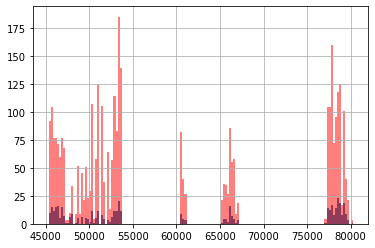

In [32]:
bins = 150
ax = recomendacao['codigo_ocorrencia4'].hist(bins = bins)
fator_contribuinte['codigo_ocorrencia3'].hist(bins = bins,color  = 'red',ax = ax,alpha = 0.5)

In [33]:
len(set(fator_contribuinte['codigo_ocorrencia3'].unique()).intersection(recomendacao['codigo_ocorrencia4'].unique()))

368

Existe uma grande interceção das chaves de fator contribuinte e recomendacao


In [34]:
df_new = df_new.merge(fator_contribuinte, how = "left", on ='codigo_ocorrencia3',validate='many_to_many')   
df_new = df_new.merge(recomendacao, how = "left", on ='codigo_ocorrencia4',validate='many_to_many')  

Assim como foi falado, as tabelas "fator_contribuinte" e "recomendação" não correspondem à informações de todas as ocorrências registradas. Mesmo assim, iremos realizar a fusão das tabelas para enriquecer os dados. 
Para realizar a fusão, vamos manter as chaves únicas já existentes, provenientes de "ocorrencia", "ocorrencia_tipo" e "aeronave" e incorporar as informações provenientes das novas duas tabelas às chaves correspondentes. 

As chaves que não possuem correspondência, serão atribuídas com "Nan" nas colunas adicionadas.


In [35]:
df_new.drop(['codigo_ocorrencia1','codigo_ocorrencia2','codigo_ocorrencia3','codigo_ocorrencia4'],axis = 1,inplace = True)
from datetime import date
# split data
df_new['ano'] = pd.to_datetime(df_new['ocorrencia_dia'],format='%d/%m/%Y').dt.year
df_new['mes'] = pd.to_datetime(df_new['ocorrencia_dia'],format='%d/%m/%Y').dt.month
df_new['dia'] = pd.to_datetime(df_new['ocorrencia_dia'],format='%d/%m/%Y').dt.day

df_new.drop(['ocorrencia_dia'],axis = 1,inplace = True)



In [210]:
df_new.drop(['aeronave_operador_categoria'],axis = 1,inplace = True)

In [36]:
df_new.head()

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_publicado,total_recomendacoes,total_aeronaves_envolvidas,...,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_status,recomendacao_destinatario_sigla,ano,mes,dia
0,52242,INCIDENTE,RS,SBPA,20:27:00,NaN,FINALIZADA,NÃO,0,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2012,1,5
1,45331,ACIDENTE,SP,SBGR,13:44:00,SIM,FINALIZADA,SIM,3,1,...,0,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,AGUARDANDO RESPOSTA,DECEA,2012,1,6
2,45331,ACIDENTE,SP,SBGR,13:44:00,SIM,FINALIZADA,SIM,3,1,...,0,ATENÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO,AGUARDANDO RESPOSTA,DECEA,2012,1,6
3,45331,ACIDENTE,SP,SBGR,13:44:00,SIM,FINALIZADA,SIM,3,1,...,0,CAPACITAÇÃO E TREINAMENTO,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO,AGUARDANDO RESPOSTA,DECEA,2012,1,6
4,45331,ACIDENTE,SP,SBGR,13:44:00,SIM,FINALIZADA,SIM,3,1,...,0,CLIMA ORGANIZACIONAL,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO,AGUARDANDO RESPOSTA,DECEA,2012,1,6


Vamos realizar um primeiro processamento dos dados para facilitar as análises. 

In [37]:
df_new['idade_aeronave'] = df_new["ano"] - df_new['aeronave_ano_fabricacao']
df_new['idade_aeronave'] = df_new['idade_aeronave'].apply(lambda x: float("nan") if x >150 or x < 0 else x)
df_new['ocorrencia_hora'] = df_new['ocorrencia_hora'].astype(str).apply(lambda x: x[:2])
def periodos(x):
    try:
        x = int(x)
    except:
        x = float("inf")
    if (x >= 6) and (x < 12):
        return "Manhã"
    elif (x >= 12) and (x < 18):
        return "Tarde"
    elif (x >= 18) and (x < 24):
        return "Noite"
    elif (x >= 0) and (x <6):
        return "Madrugada"
    else:
        return None
df_new['periodo'] = df_new['ocorrencia_hora'].apply(periodos)


In [38]:
df_new.head()

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_publicado,total_recomendacoes,total_aeronaves_envolvidas,...,fator_aspecto,fator_condicionante,fator_area,recomendacao_status,recomendacao_destinatario_sigla,ano,mes,dia,idade_aeronave,periodo
0,52242,INCIDENTE,RS,SBPA,20,NaN,FINALIZADA,NÃO,0,1,...,NaN,NaN,NaN,NaN,NaN,2012,1,5,9.0,Noite
1,45331,ACIDENTE,SP,SBGR,13,SIM,FINALIZADA,SIM,3,1,...,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,AGUARDANDO RESPOSTA,DECEA,2012,1,6,11.0,Tarde
2,45331,ACIDENTE,SP,SBGR,13,SIM,FINALIZADA,SIM,3,1,...,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO,AGUARDANDO RESPOSTA,DECEA,2012,1,6,11.0,Tarde
3,45331,ACIDENTE,SP,SBGR,13,SIM,FINALIZADA,SIM,3,1,...,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO,AGUARDANDO RESPOSTA,DECEA,2012,1,6,11.0,Tarde
4,45331,ACIDENTE,SP,SBGR,13,SIM,FINALIZADA,SIM,3,1,...,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO,AGUARDANDO RESPOSTA,DECEA,2012,1,6,11.0,Tarde


In [39]:
print(df_new.nunique())

codigo_ocorrencia                  5167
ocorrencia_classificacao              3
ocorrencia_uf                        27
ocorrencia_aerodromo                513
ocorrencia_hora                      25
investigacao_aeronave_liberada        2
investigacao_status                   2
divulgacao_relatorio_publicado        2
total_recomendacoes                  13
total_aeronaves_envolvidas            3
ocorrencia_saida_pista                2
ocorrencia_tipo                      80
ocorrencia_tipo_categoria            80
aeronave_matricula                 3902
aeronave_operador_categoria          10
aeronave_tipo_veiculo                 9
aeronave_modelo                     737
aeronave_motor_tipo                   5
aeronave_motor_quantidade             5
aeronave_pmd                        459
aeronave_assentos                    86
aeronave_ano_fabricacao              80
aeronave_registro_categoria           9
aeronave_registro_segmento           12
aeronave_voo_origem                 677


#### Análise de dados ausentes:

<AxesSubplot:>

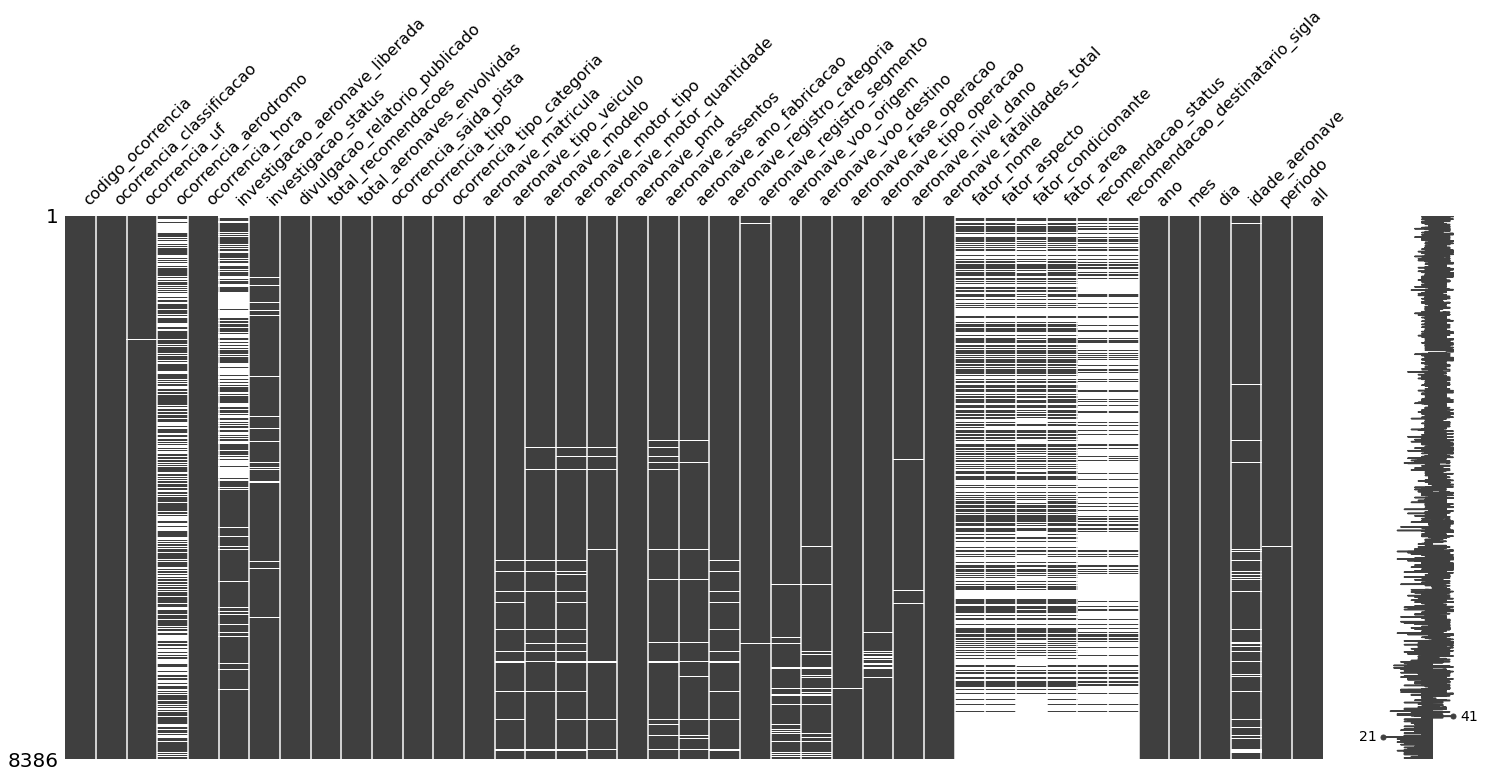

In [211]:
msno.matrix(df_new)

<AxesSubplot:>

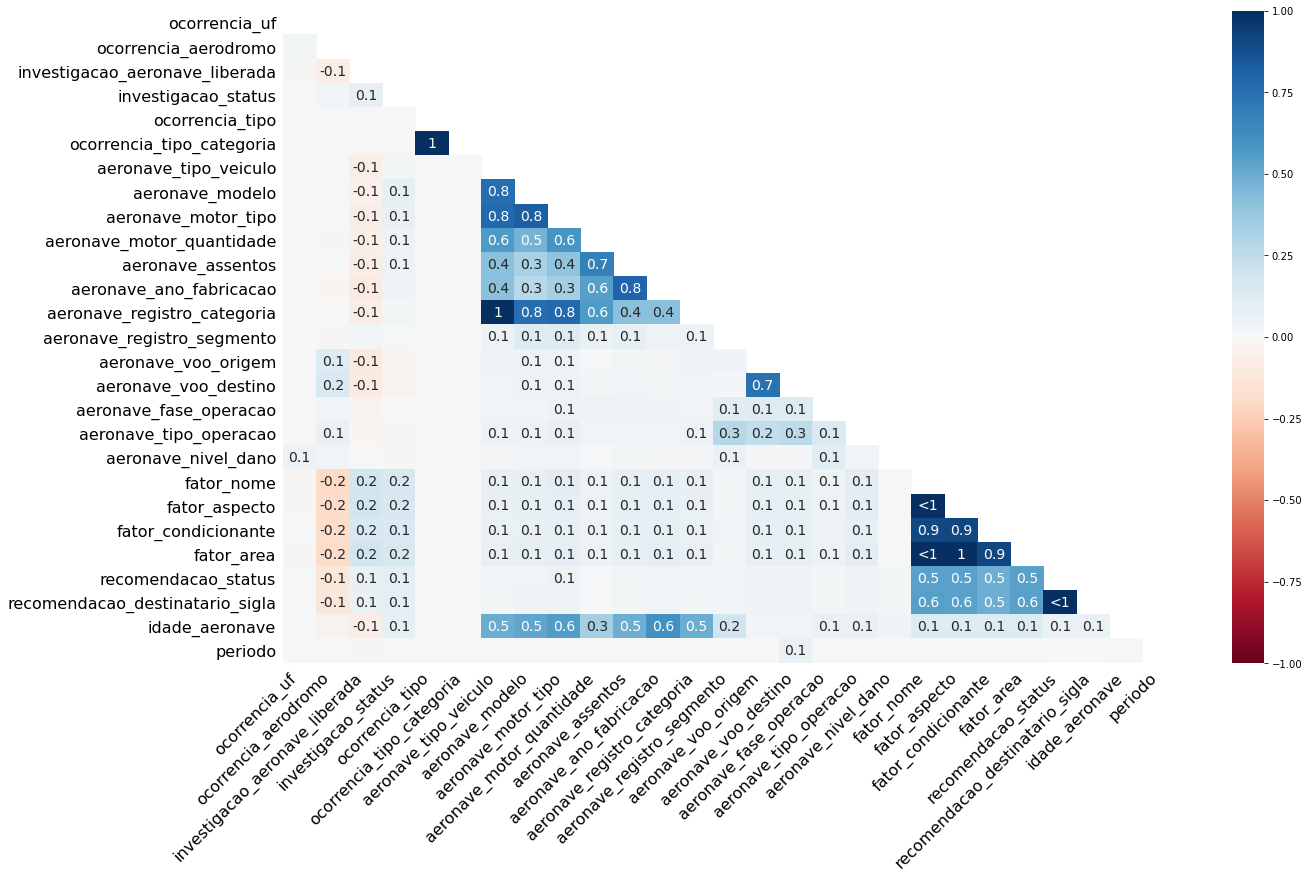

In [212]:
msno.heatmap(df_new)

A partir do gráfico acima é possível entender a relação de dados ausentes entre variáveis. 
É possível notar que várias das correlações mais próximas da extremidade são devido a motivos de coleta de dados em si. Por exemplo, tipo do veículo e registro da categoria da aeronave. Outra fonte de correlação entre missing são os dados provenientes da tabela Fator, que apresentou muitos dados ausentes. 

De maneira geral, não existe nenhuma correlação de dados ausentes e variáveis que seja essencialmente danosa à análise. Por exemplo, se duas variáveis, aparentemente sem relação, apresentassem uma correção de dados ausentes, poderíamos extrair alguma informação mais relevante, ou até mesmo duvidar da forma com que os dados foram capturados. Mas não é esse o caso.



### Data visualisation:

<AxesSubplot:xlabel='ano', ylabel='count'>

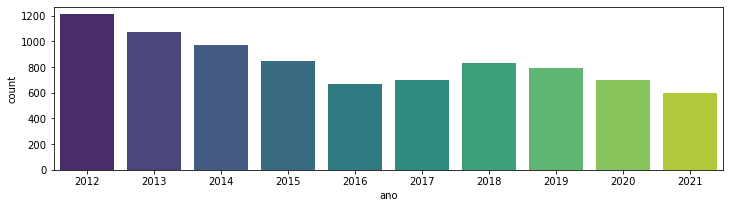

In [41]:
plt.figure(figsize=(12,3))
sns.countplot(x='ano',data=df_new, palette='viridis')

As ocorrencias mostraram uma tendencia negativa, com excecção de 2018, em que os níveis subiram. 

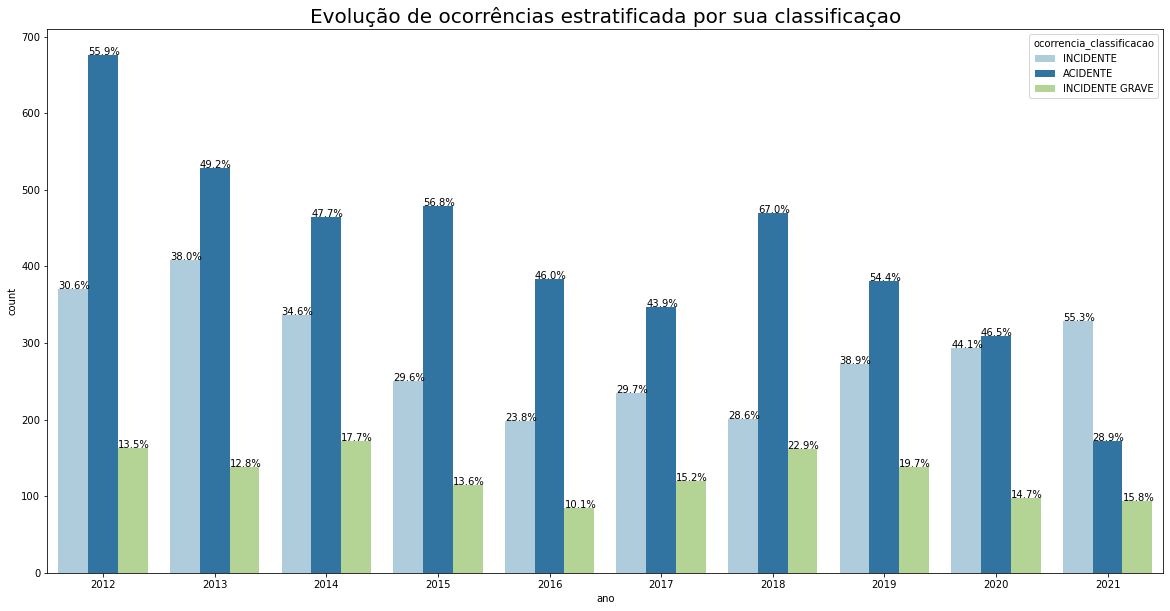

In [42]:
plt.figure(figsize=(20,10))
data = df_new[['ocorrencia_classificacao','ano']].copy()

ax = sns.countplot(x='ano',data=data.dropna(),hue='ocorrencia_classificacao', palette='Paired')
ax.set_title('Evolução de ocorrências estratificada por sua classificaçao',fontsize =20)
i = 0
total= data.dropna()['ano'].value_counts()
for p in ax.patches:
    tot = total.iloc[int(i%10)]
    ax.annotate('{:.1f}%'.format(100*p.get_height()/tot), (p.get_x(), p.get_height()))
    i =i + 1


A proporção de classes, de forma qualitativa, se mantém a mesma ao longo dos anos, com exceção de 2021 em que ocorreram mais incidentes. A partir de 2018 os incidentes começaram a crescer de maneira consistente. O ano de 2018 mudou a natureza das ocorrências.

As porcentagens representam a proporção em relação ao seu ano. Esse dado é importante pois como o número de ocorrência mudam ao longo dos anos, o tamanho da barra pode gerar confusão.  


<AxesSubplot:xlabel='mes', ylabel='count'>

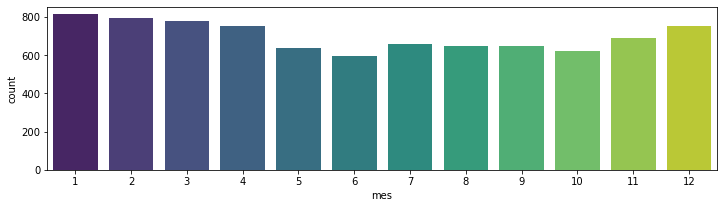

In [43]:
plt.figure(figsize=(12,3))
sns.countplot(x='mes',data=df_new, palette='viridis')

Sem tendencia considerável para a distribuição mensal de ocorrências. Existe um maior número de ocorrências no final do ano e no início do ano, mas isso é decorrente de um maior número de viagens realizadas, e não por alguma causa. 

count    7755.000000
mean       23.302515
std        16.044979
min         0.000000
25%         9.000000
50%        21.000000
75%        37.000000
max        79.000000
Name: idade_aeronave, dtype: float64


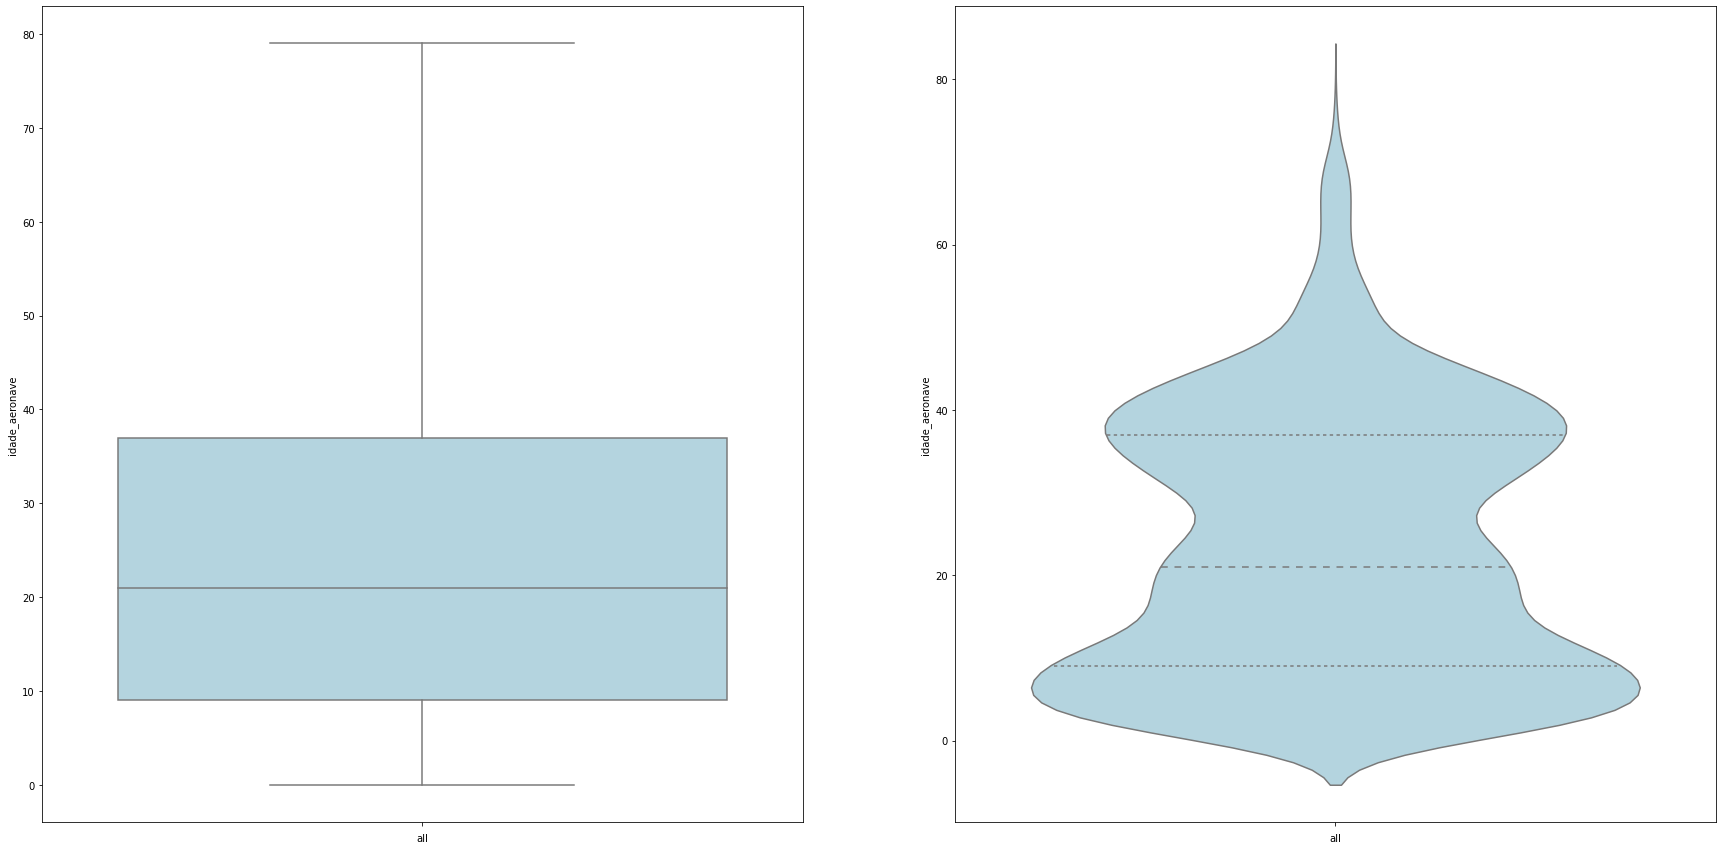

In [44]:
df_new['all'] = ""
fig, ax = plt.subplots(1,2)
fig.set_size_inches(30, 15)
sns.boxplot(data=df_new, x="all", y='idade_aeronave', ax=ax[0], color="lightblue")
sns.violinplot(data=df_new, x="all", y='idade_aeronave', ax=ax[1], inner="quartile", color="lightblue")
print(df_new['idade_aeronave'].describe())

Essa é a distribuição das idades das aeronaves. Existem duas modas importantes: aproximadamente 10 anos e aproximadamente 40 anos.

###### Tipo de ocorrencias:

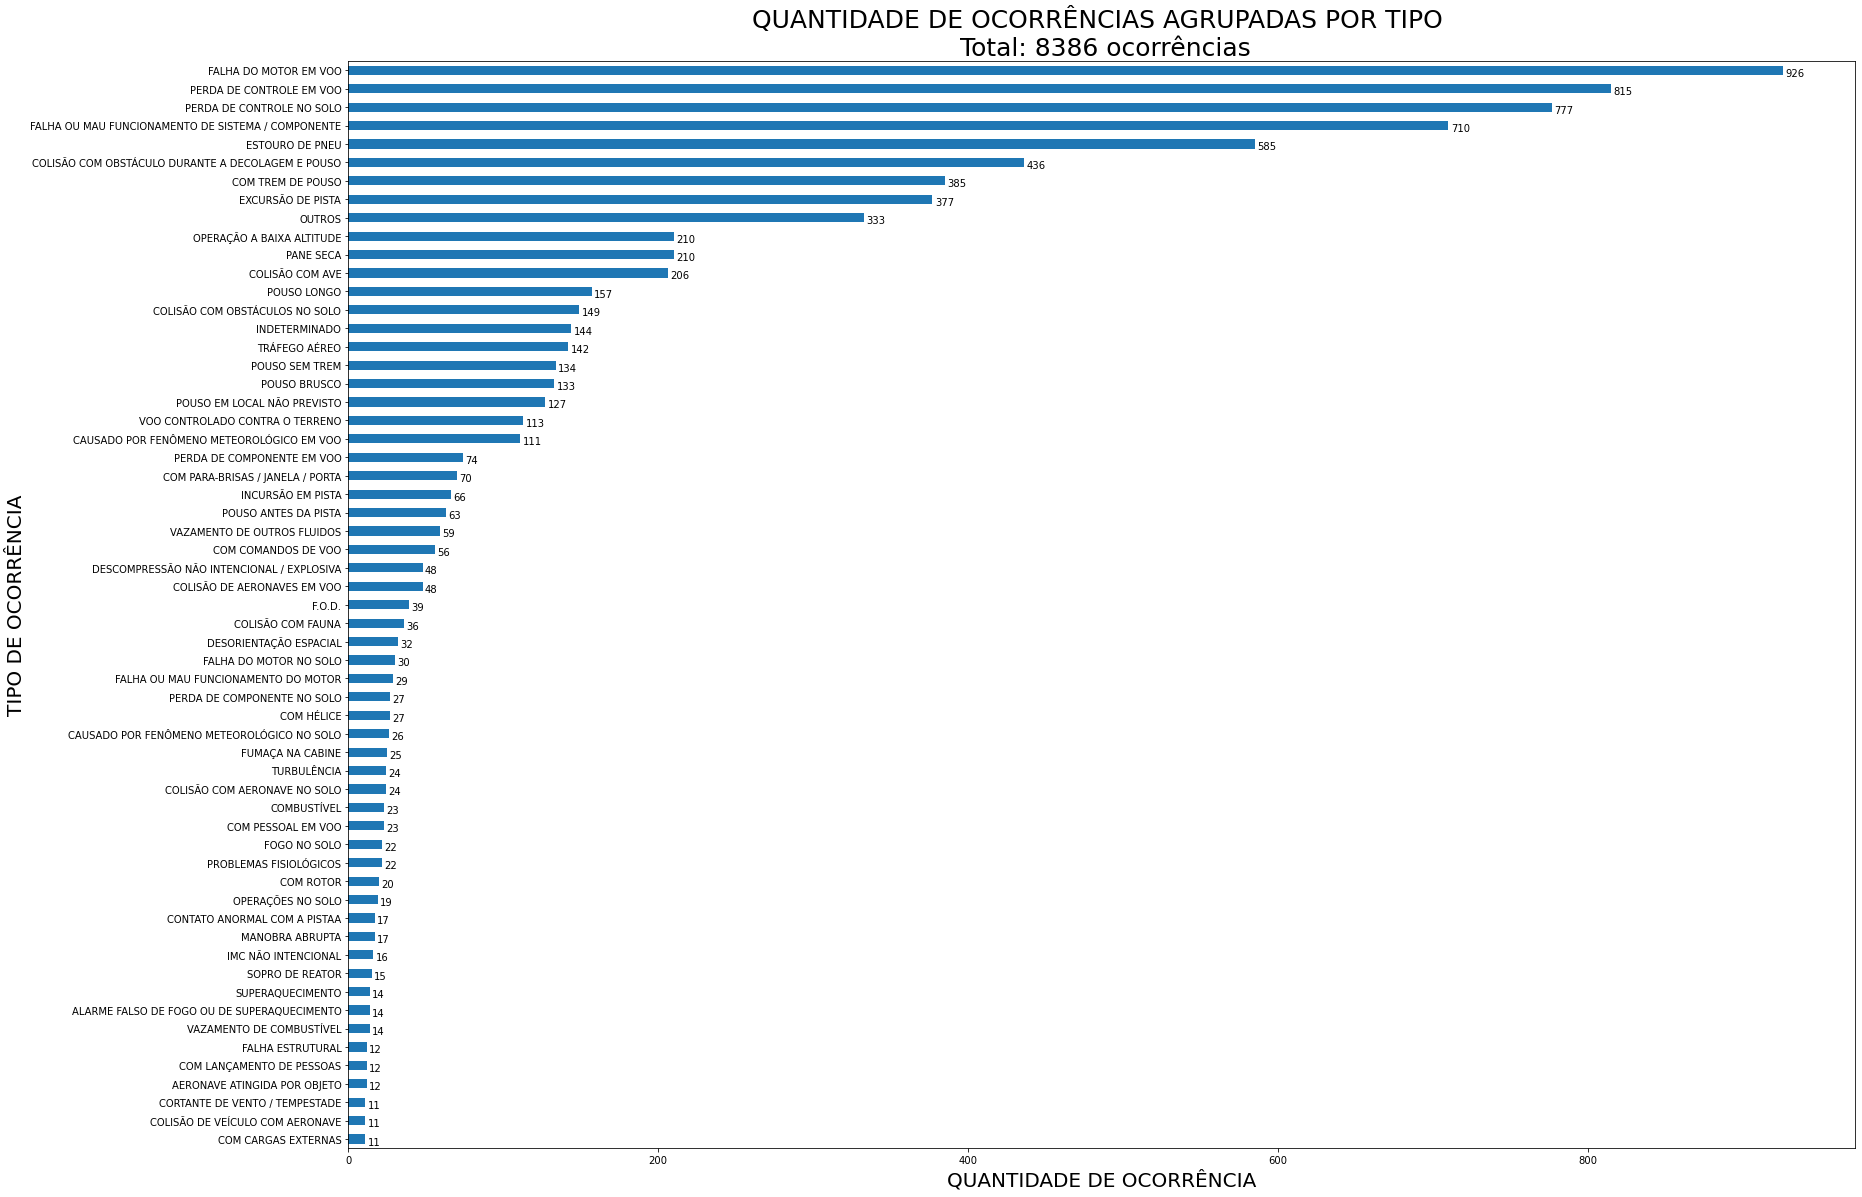

In [45]:
data = df_new.groupby('ocorrencia_tipo').count()['codigo_ocorrencia'].sort_values()
data = data[data>10]
ax = data.plot(kind='barh',  figsize=(27,20))
#color=random.choice(colors)

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1.5, p.get_y() - 0.05))
total = df_new.shape[0]
plt.title('QUANTIDADE DE OCORRÊNCIAS AGRUPADAS POR TIPO \n Total: ' + str(total) + ' ocorrências',fontsize = 25)  
plt.ylabel('TIPO DE OCORRÊNCIA',fontsize = 20)
plt.xlabel('QUANTIDADE DE OCORRÊNCIA',fontsize = 20)

plt.show()

In [342]:
data.sort_values(ascending = False)[:20]

data.sort_values(ascending = False)[:20].to_numpy().sum()/data.sort_values().to_numpy().sum()


0.8529198841698842

In [256]:
20/len(data)


0.3389830508474576

Existe uma concentração considerável no tipo de ocorrência que existe. Os 33% dos tipos de ocorrências com mais eventos correspondem a 85% do total de eventos existentes. O gráfico acima é bom para ver essa concentração de número de ocorrências.

Isso mostra que para tentar diminuir o número de ocorrências, é interessante estudar esses tipos de ocorrências mostrados no gráfico acima. Seria interessante realizar um estudo mais aprofundado dos tipos de ocorrências para entender melhor o problema de negócio que está sendo estudado. Na tabela abaixo será mostrado em termos de números de fatalidades.


In [258]:
f_fatais=df_new.groupby(['ocorrencia_tipo']).agg({'aeronave_fatalidades_total': ma.count})
f_fatais.sort_values('aeronave_fatalidades_total', ascending=False).head(15)


,aeronave_fatalidades_total
ocorrencia_tipo,
FALHA DO MOTOR EM VOO,926
PERDA DE CONTROLE EM VOO,815
PERDA DE CONTROLE NO SOLO,777
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE,710
ESTOURO DE PNEU,585
COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,436
COM TREM DE POUSO,385
EXCURSÃO DE PISTA,377
OUTROS,333


A partir da tabela acima, vamos analisar os tipos de ocorrência em termos de três tipos de motivos. O primeiro são os motivos de aeronave, como, por exemplo, "Falha em motor em voo", "FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE","ESTOURO DE PNEU", "FALHA DO MOTOR EM VOO" e "PANE SECA". Esses motivos geram ocorrências que acarretam um considerável número de mortes são causados por problemas técnicos da aeronave em sí. Assim, para atacar esse ponto, seria interessante desenvolver técnicas de manutenção preventiva. E, que essas técnicas, sejam utilizadas também nas operações do setor privado. 

Outro fator importante é o humano. Ele aparece nos tipos "PERDA DE CONTROLE EM VOO", "PERDA DE CONTROLE NO SOLO". Vale a pena ressaltar que não podemos falar de maneira categórica que esses fatores são devido ao fator humano, mas por fim de análise vamos considerar que sim. 
Para atacar esse tipo de problema, pode-se criar treinamentos de situações difíceis para pilotos.

For fim, existem fatores que são puramente aleatórios, como "COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO", "COLISÃO COM AVE" e "COLISÃO COM OBSTÁCULOS NO SOLO" que não podem ser previstos nem evitados de maneira geral.


###### Fase de operação:

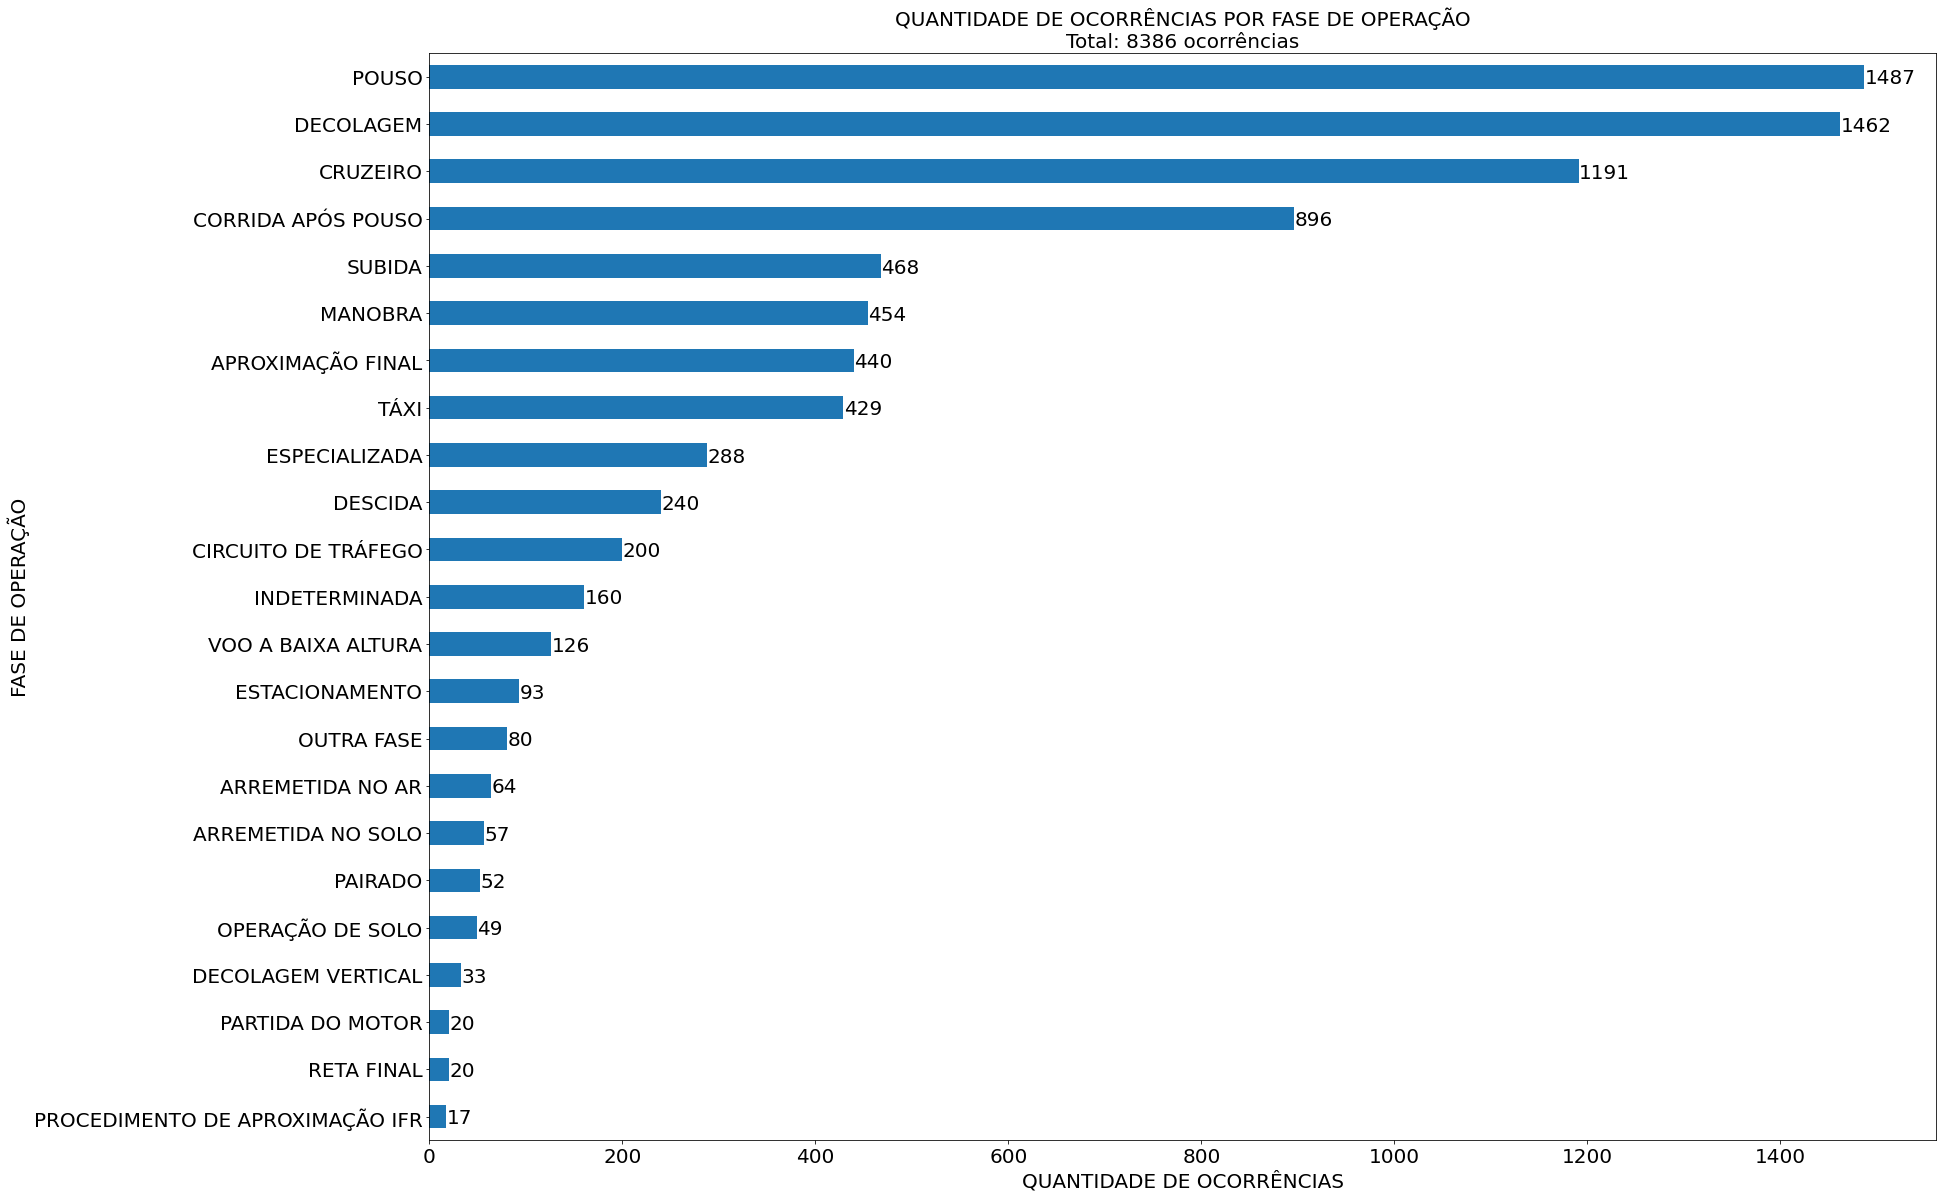

In [53]:
fase_de_operacao = df_new.groupby('aeronave_fase_operacao').count()['codigo_ocorrencia'].sort_values()
fase_de_operacao = fase_de_operacao[fase_de_operacao > 10]
ax = fase_de_operacao.plot(kind='barh',  figsize=(27,20),fontsize = 20)
for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + .5, p.get_y() + 0.1),fontsize = 20)

tot = df_new['aeronave_fase_operacao'].shape[0]

plt.title('QUANTIDADE DE OCORRÊNCIAS POR FASE DE OPERAÇÃO\nTotal: ' + str(tot) + ' ocorrências',fontsize = 20)
plt.xlabel('QUANTIDADE DE OCORRÊNCIAS',fontsize = 20)
plt.ylabel('FASE DE OPERAÇÃO',fontsize = 20)
plt.show()

In [54]:
(1487+896)/8386

0.28416408299546864

De fato, o momento do pouso é um dos mais importantes da viagem. Se considerarmos o pouso em si, em conjunto com a corrida após o pouso, engloba cerca de aproximadamente 30 % das ocorrências. Contudo, vale ressaltar que o número de ocorrências na decolagem está consideravelmente próximo ao pouso, fazendo dela uma operação delicada também. Já a fase de cruzeiro, que se encontra em terceira posição, é o momento da viagem em si, quando o avião está trafegando da origem ao destino. É interessante notar qeu o avião passa a grande parte do tempo na fase de cruzeiro, e, mesmo assim, essa faze está abaixo de pouso e decolagem. Assim, podemos entender que, se as ocorrências acontecessem de maneira uniformemente aleatória no tempo, a fase do cruzeiro teria uma concentração maior de ocorrências em contraposição às fases de pouso e decolagem. 


Como já foi dito anteriormente, nem toda ocorrência gerada resulta em fatalidades e danos na aeronave. Uma ocorrência, como o nome já diz, se refere ao fato de que algum evento não previsto ocorreu.

Assim, podemos entender que o pouso e decolagem são as fases mais complexas e que carece de mais atenção.


###### Dano na aeronave (pouso e decolagem):

In [257]:
idxs = df_new['aeronave_nivel_dano'].value_counts().fillna(0).index.to_list()
data_c = pd.DataFrame([[0,0,0,0]], columns = idxs)

aux = df_new[df_new['aeronave_fase_operacao'] == 'POUSO']
data_c += aux['aeronave_nivel_dano'].value_counts().fillna(0)

aux = df_new[df_new['aeronave_fase_operacao'] == 'DECOLAGEM']
data_c += aux['aeronave_nivel_dano'].value_counts().fillna(0)

aux = df_new[df_new['aeronave_fase_operacao'] == 'CORRIDA APÓS POUSO']
idx = aux['aeronave_nivel_dano'].value_counts().fillna(0).index.to_list()
for i in idx:
    data_c[i] += aux['aeronave_nivel_dano'].value_counts().fillna(0).loc[i]
    
fatais = aux['aeronave_fatalidades_total'].sum()
data_c['total fatalidades'] = fatais
data_c

,SUBSTANCIAL,NENHUM,LEVE,DESTRUÍDA,total fatalidades
0,1847,677,1080,216,1


###### Dano na aeronave - demais fases de operação:

In [124]:
data_nc = pd.DataFrame([[0,0,0,0]], columns = idxs)

aux = df_new[df_new['aeronave_fase_operacao'] != 'POUSO']
aux = aux[aux['aeronave_fase_operacao'] != 'DECOLAGEM']
aux = aux[aux['aeronave_fase_operacao'] != 'CORRIDA APÓS POUSO']

idx = aux['aeronave_nivel_dano'].value_counts().fillna(0).index.to_list()
for i in idx:
    data_nc[i] += aux['aeronave_nivel_dano'].value_counts().fillna(0).loc[i]
fatais = aux['aeronave_fatalidades_total'].sum()
data_nc['total fatalidades'] = fatais
data_nc

,SUBSTANCIAL,NENHUM,LEVE,DESTRUÍDA,total fatalidades
0,1494,1471,764,770,2492


Os dados acima corroboram com a hipótese de que a decolagem e pouso são as partes mais críticas, no sentido em que existem mais fatores e uma maior probabilidade de algo sair do esperado. Note que mesmo incorporando menos da metade das ocorrências, as fases de pouso e decolagem abrangem um número considerável de danos substanciais. 

Entretanto, quando analisamos no número total de fatalidades, a diferença é bem considerável. Basicamente essas três fases, apesar de se mostrarem críticas em termos de ocorrências, felizmente, em termos de número de fatalidades não são representativas. 

Assim, podemos entender que as fases de operação de pouso e decolagem não tendem a gerar fatalidades. Logo, para minimizar o número de vítimas fatais, talvez essas fases de operação não sejam o foco do estudo.


###### Tipo operação aeronave:

In [144]:
dados_aeronave=df_new.groupby(['aeronave_tipo_operacao']).agg({'codigo_ocorrencia':ma.count })                      
# Ordenar do maior valor para o menor

dados_aeronave['num fatalidades'] =df_new.groupby(['aeronave_tipo_operacao']).agg({'aeronave_fatalidades_total':ma.sum })
dados_aeronave = dados_aeronave.sort_values('codigo_ocorrencia', ascending=False).head(20)
dados_aeronave.rename(columns={"codigo_ocorrencia": "num ocorrencias"},inplace = True)
dados_aeronave


,num ocorrencias,num fatalidades
aeronave_tipo_operacao,,
PRIVADA,2991,1932
REGULAR,1266,0
INSTRUÇÃO,1156,234
AGRÍCOLA,1115,277
TÁXI AÉREO,942,484
POLICIAL,284,146
EXPERIMENTAL,248,86
ESPECIALIZADA,122,20
NÃO REGULAR,103,0


Pela tabela acima, podemos entender que a operação Privada é o tipo de operação que chama muita atenção, visto que, é o tipo mais frequente de ocorrências e com maior número de fatalidades. Mais de 60% do número de fatalidades é proveniente desse tipo de operação.

Uma hipótese para a explicação desse fato é a dificuldade controle e padronização para os protocolos de voo em operações privadas.
 

###### Ocorrencias e fatalidades por UF:

In [182]:
fatais = df_new[['ocorrencia_uf','aeronave_fatalidades_total']].groupby('ocorrencia_uf').sum()

totais = df_new[['ocorrencia_uf']].value_counts().to_frame()
totais.columns = ['num ocorrencias']
totais = totais.loc[fatais.index.to_list()]
totais['num fatalidades'] = fatais['aeronave_fatalidades_total'].values
totais.sort_values(by = 'num ocorrencias',inplace = True,ascending = False)
totais.head(15)

,num ocorrencias,num fatalidades
ocorrencia_uf,,
SP,1831,624
MG,670,262
PR,645,155
RS,636,138
RJ,567,115
MT,537,211
GO,500,297
PA,475,452
AM,398,278


###### Idade da aeronave:

In [187]:
df_new[['idade_aeronave','aeronave_fatalidades_total']].corr()

,idade_aeronave,aeronave_fatalidades_total
idade_aeronave,1.000000,0.027127
aeronave_fatalidades_total,0.027127,1.000000


Uma intuição do senso comum seria de que as aeronaves mais velhas tendem a gerar acidentes mais fatais, devido à falta de tecnologia embarcada. Entretanto não é isso que esses dados que temos mostra. 
Não podemos descartar essa hipótese de forma categórica, porém não será o foco do nosso estudo, por hora.


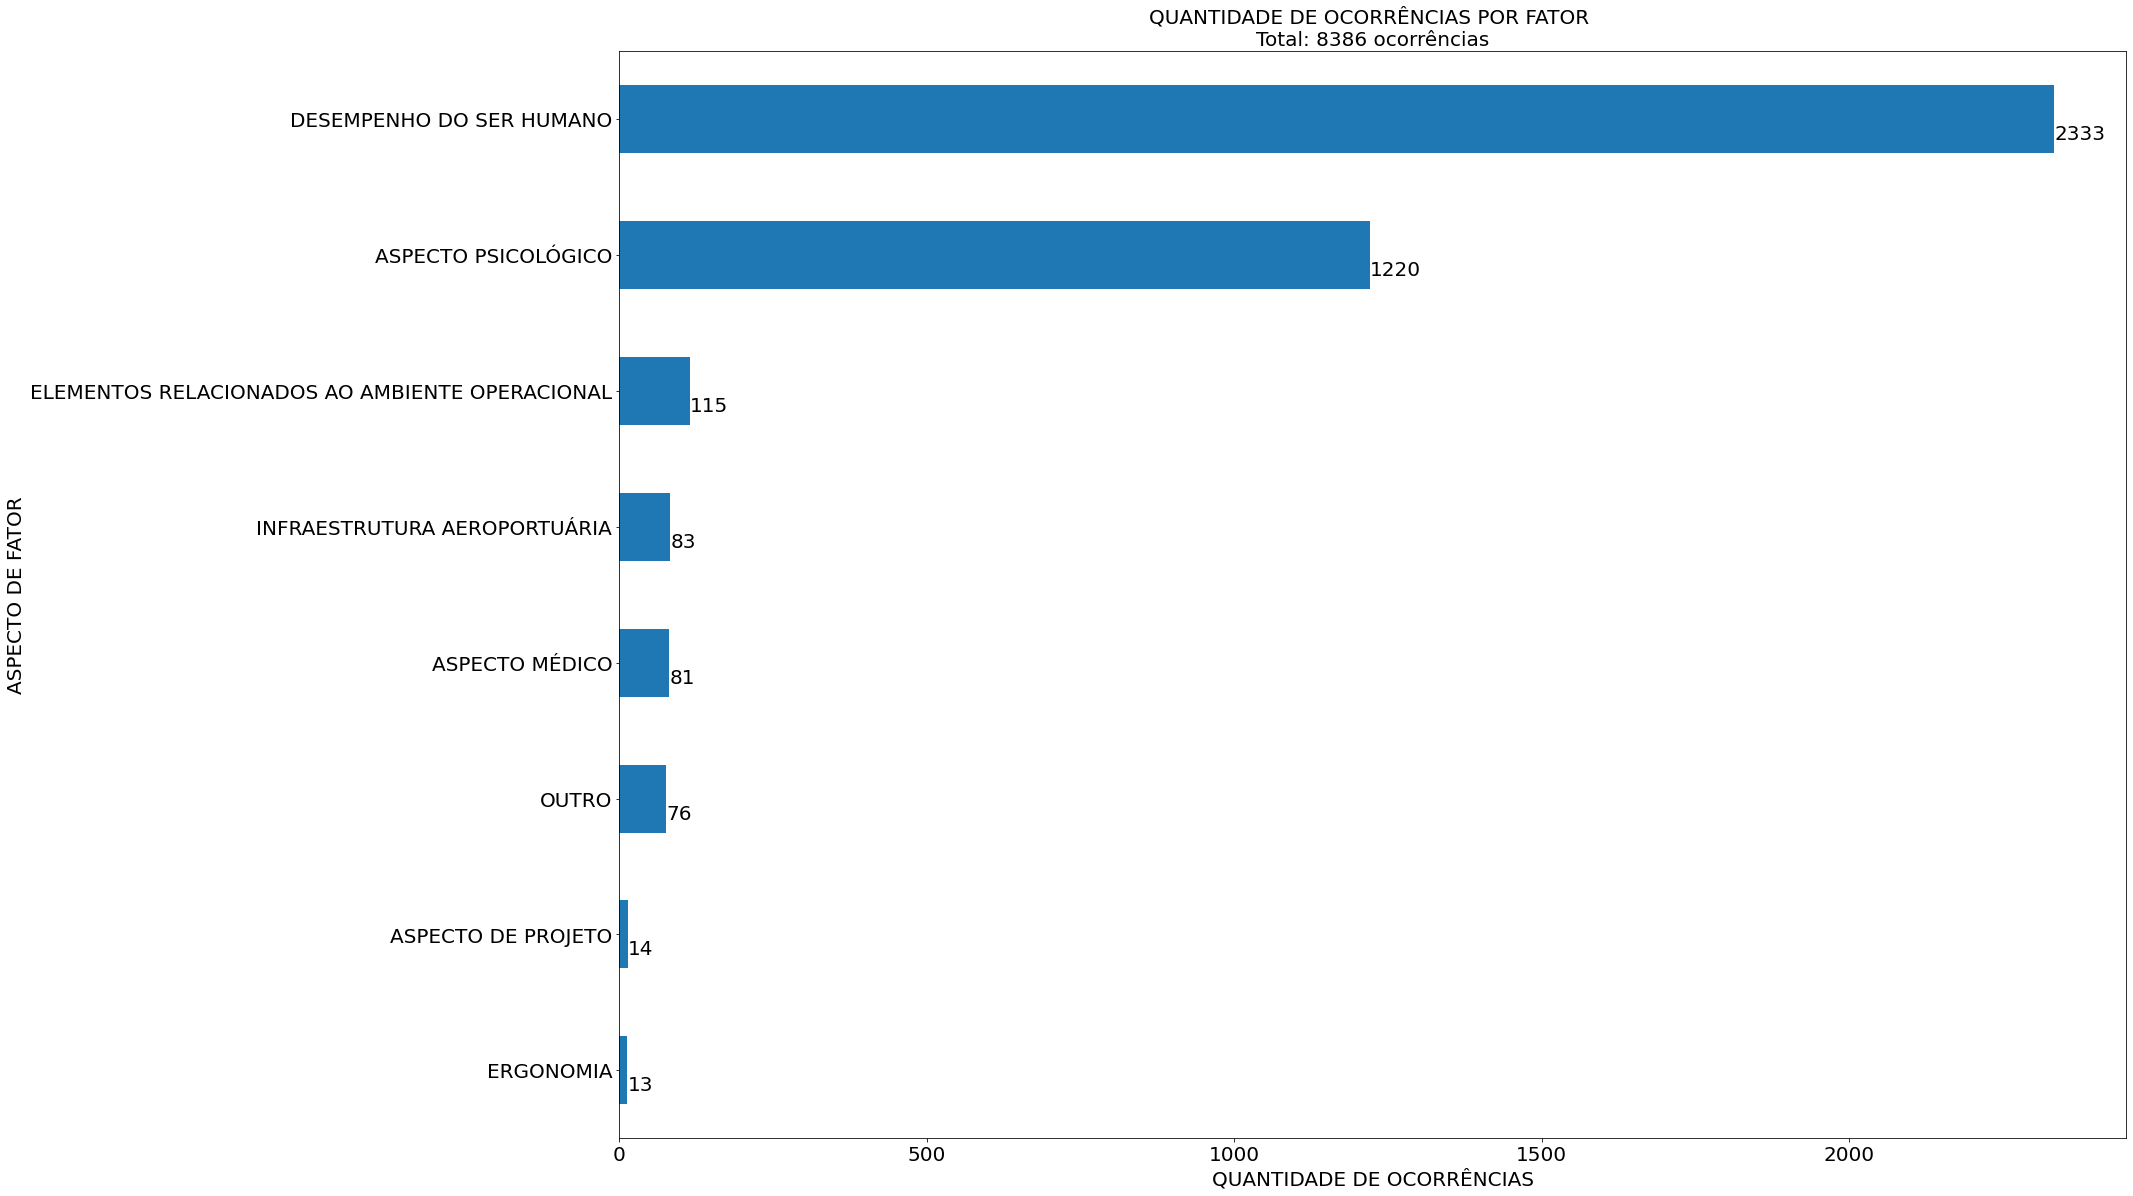

In [195]:
fat_asp = df_new.groupby('fator_aspecto').count()['codigo_ocorrencia'].sort_values()
fat_asp = fat_asp[fat_asp > 10]
ax = fat_asp.plot(kind='barh',  figsize=(27,20),fontsize = 20)
for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + .5, p.get_y() + 0.1),fontsize = 20)

tot = df_new['fator_aspecto'].shape[0]

plt.title('QUANTIDADE DE OCORRÊNCIAS POR FATOR \nTotal: ' + str(tot) + ' ocorrências',fontsize = 20)
plt.xlabel('QUANTIDADE DE OCORRÊNCIAS',fontsize = 20)
plt.ylabel('ASPECTO DE FATOR',fontsize = 20)
plt.show()

Mesmo que essa variável tenha uma grande quantidade partes ausentes. É possível entender que o fator humano tem grande influência no número de ocorrências.

### Conclusão


Aviões e aeronaves não estão isentos de sofrerem acidentes e problemas. A história tem registros de casos em que centenas de pessoas morreram e milhares de ocorrências foram geradas. Não obstante, vale lembrar que, embora o impacto gerado por uma queda de avião seja grande, sua probabilidade de ocorrer ainda é pequena.

Com base nas análises realizadas, podemos entender que no ano de 2018 houve uma certa alteração na natureza dos números de ocorrências, já que a tendencia negativa que existia acabou. Além disso, pode-se considerar que as etapas de pouso e decolagem são as mais complexas e que geram grande quantidade de ocorrências, entretanto essas ocorrências não geram fatalidades. 

Outro ponto muito relevante extraído da análise foi o fato de que a principal origem dos acidentes é proveniente das operações privadas. Isso corrobora com o senso comum, visto que, as tragédias aéreas noticiadas geralmente são aviões particulares. Por fim, vale ressaltar que o fator humano tem grande influência nas causas das ocorrências. Para tal, pode-se propor treinamento especializado para pilotos, além de aumentar a quantidade de tecnologia embarcada para dar suporte ao piloto.

Em suma, o estudo foi de grande valia para entender o problema em sí e quais soluções serão mais efetivas. Para uma análise mais aprofundada, o estudo ainda carece da criação de modelos estatísticos para extrair padrões e relações mais ocultas. Poderia criar uma modelo causal de regressão linear para prever o número de vítimas em um certo acidente. Essa modelagem seria feita escolhendo as variáveis que de fato potencialmente influenciam o número de vítimas. Assim, os coeficientes desse modelo poderiam ser usados como grau de influência.

Como existem várias variáveis categóricas, os estudo apresentado aqui, focou no entendimento do problema e nos dados em si.
